In [23]:
import pyswmm
import sys, os
import pystorms
import numpy as np
import pandas as pd
from pyswmm import Output
import matplotlib.pyplot as plt
from swmm.toolkit.shared_enum import NodeAttribute

In [2]:
input_file = pystorms.networks.load_network("epsilon")

In [3]:
simulation = pyswmm.Simulation(inputfile=input_file)
simulation.execute();


... SWMM Version 5.2.3
 o  Retrieving project data
 o  Simulating day: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 0     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 1     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 2     hour: 3     hour: 3     hour: 3     hour: 3     hour: 3     hour: 3   

In [11]:
weirs = {"ISD001": "004",
         "ISD002": "006",
         "ISD003": "011",
         "ISD004": "022",
         "ISD005": "027",
         "ISD006": "030",
         "ISD007": "033",
         "ISD008": "039",
         "ISD009": "044",
         "ISD010": "050",
         "ISD011": "060"}

In [19]:
list(weirs.values())

['004', '006', '011', '022', '027', '030', '033', '039', '044', '050', '060']

In [16]:
output_file = input_file[:-3] + "out"

In [17]:
out = Output(output_file)

In [79]:
depth = pd.DataFrame()
for node_id in list(weirs.values()):
    depth_i = out.node_series(node_id, attribute=NodeAttribute.INVERT_DEPTH)
    depth = pd.concat([depth, pd.DataFrame(data={node_id: depth_i.values()}, index=depth_i.keys())], axis=1)

<Axes: >

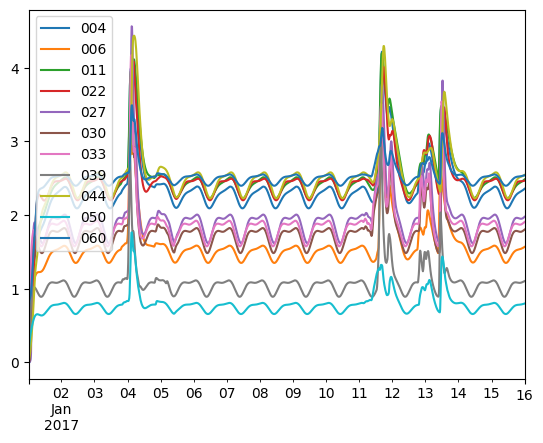

In [80]:
depth.plot()

### Corrupt Data

1. gaps for 3 hours
2. flatlines for 1 hour
3. add noise on data for couple of days

In [86]:
for _ in range(0, 5):
    columns = np.random.choice(11, 4, replace=False)
    day = np.random.choice(np.linspace(1, 15, 15, dtype=int), 1)[0]
    hour = np.random.choice(np.linspace(1, 23, 23, dtype=int), 1)[0]
    start_time = pd.Timestamp(f"2017-01-{day} {hour}:00:00")
    end_time = start_time + pd.Timedelta("3hr")
    depth.loc[start_time:end_time,].iloc[columns] = np.nan

In [87]:
for _ in range(0, 10):
    columns = np.random.choice(11, 4, replace=False)
    day = np.random.choice(np.linspace(1, 15, 15, dtype=int), 1)[0]
    hour = np.random.choice(np.linspace(1, 24, 24, dtype=int), 1)[0]
    start_time = pd.Timestamp(f"2017-01-{day} {hour}:00:00")
    end_time = start_time + pd.Timedelta("1hr")
    for i_c in columns:
        depth.iloc[:,i_c].loc[start_time:end_time] = depth.loc[start_time].iloc[i_c]

In [90]:
np.random.normal(0.0, 0.1, 100)

array([ 0.05406045, -0.01749496,  0.16475617,  0.05602294,  0.04537372,
       -0.04022181, -0.00560807,  0.02679001, -0.1555201 , -0.13827073,
       -0.04150604, -0.13277646, -0.08058836, -0.14768971, -0.06786607,
        0.08137865, -0.03195933,  0.02683665,  0.08995783,  0.05784062,
        0.00674812,  0.13979842,  0.06404088, -0.05287065, -0.13267744,
       -0.11366997, -0.0355773 ,  0.06678121, -0.13632476,  0.10315436,
        0.03562274, -0.14217765,  0.14000955,  0.09768501, -0.00672973,
       -0.0137444 ,  0.01704462, -0.09833674,  0.00661446, -0.13400125,
        0.12853507,  0.11880562,  0.09838795,  0.08088298, -0.00729141,
       -0.13196154, -0.02866345, -0.02530953,  0.08986477,  0.02031704,
       -0.08913082, -0.05477545,  0.00783324, -0.11850795, -0.16177199,
        0.13721517, -0.02287336, -0.16552754, -0.10536791,  0.02179076,
        0.14770911,  0.22865865,  0.057427  ,  0.10783269, -0.13650218,
       -0.02891646,  0.10557963,  0.17686923, -0.03295418, -0.05